In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import warnings

In [85]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<b>
gender = gender;
age = age;
hypertension = Hypertension binary feature;
heart_disease = Heart disease binary featur;
ever_married = Has the patient ever been married?;
work_type = Work type of the patient;
Residence_type = Residence type of the patient;
avg_glucose_level = Average glucose level in blood;
bmi = Body Mass Index; </b>

#### Заменем пропущенные значения в "bmi" средним значением "bmi" для их пола

In [87]:
F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28


In [88]:
df_res = df.drop('id',axis = 1)
df_res.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [89]:
# Преобразуем наши данные в новый тип
df_res['gender'] = df_res['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df_res['Residence_type'] = df_res['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df_res['work_type'] = df_res['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df_res['ever_married'] = df_res['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
df_res['smoking_status'] = df_res['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [90]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   uint8  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   uint8  
 5   work_type          5110 non-null   uint8  
 6   Residence_type     5110 non-null   uint8  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   uint8  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 264.6 KB


# Визуализируем данные

## Heatmap

<AxesSubplot:>

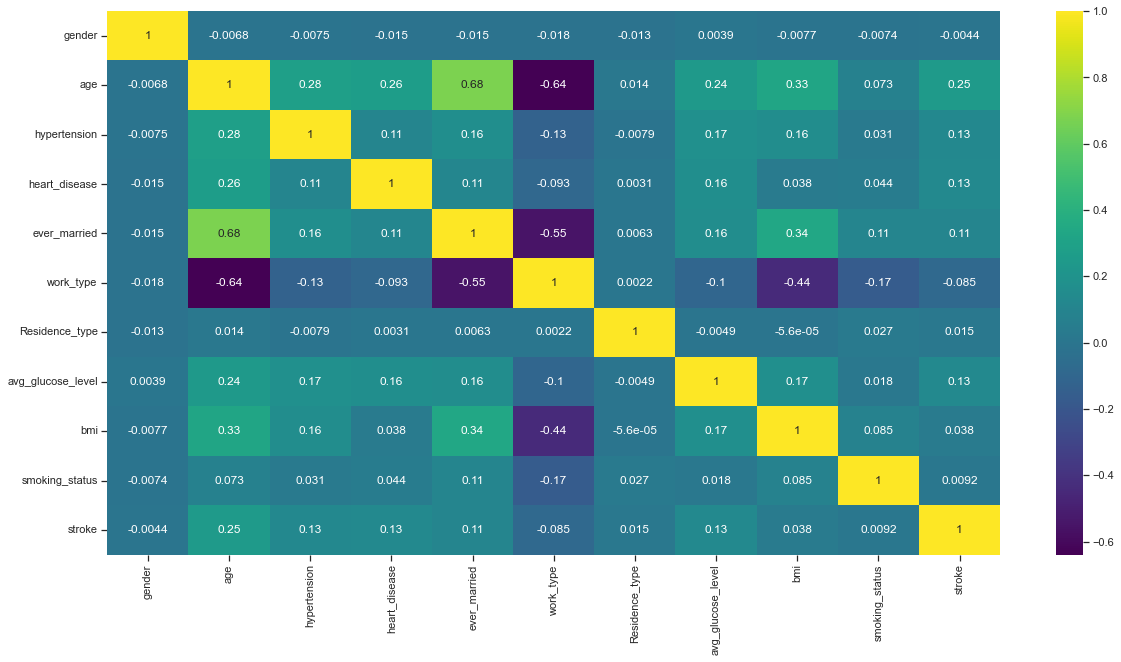

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(df_res.corr(), annot= True,cmap= 'viridis')

## Гистограммы распределение признаков

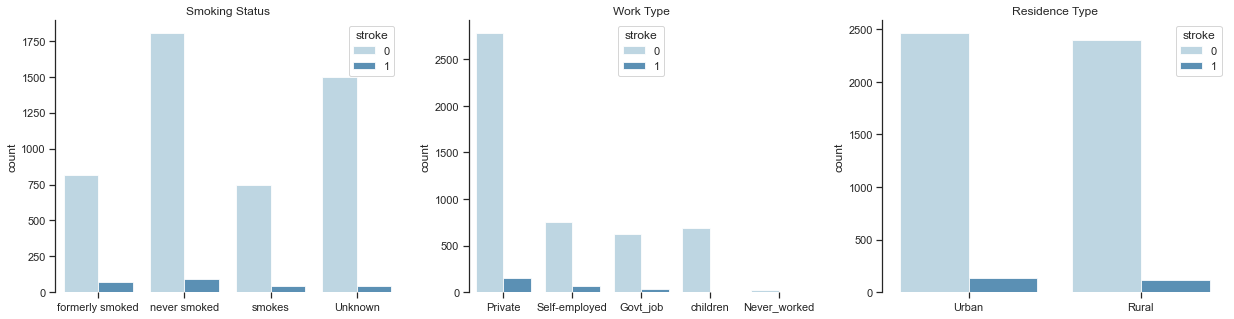

In [92]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Paired",hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x=df['Residence_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');

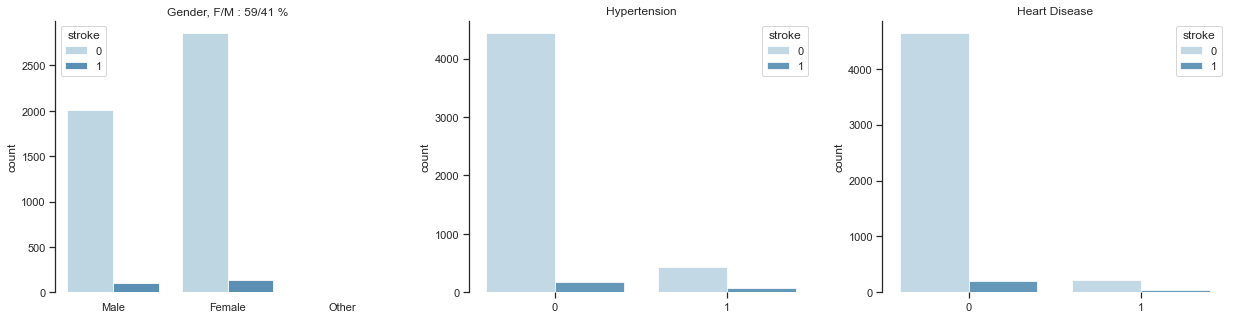

In [93]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['gender'], alpha=0.8, palette="Paired", hue=df['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

## Boxplot



<AxesSubplot:xlabel='avg_glucose_level'>

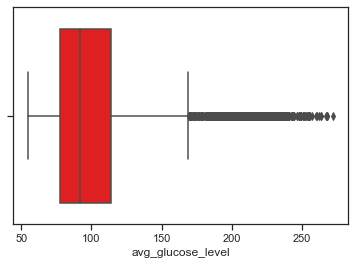

In [94]:
sns.boxplot(x='avg_glucose_level',data=df, color='Red')


<AxesSubplot:xlabel='bmi'>

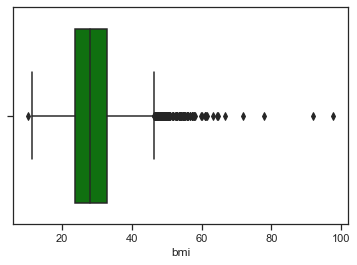

In [95]:
sns.boxplot(x='bmi',data=df, color = 'Green')


<AxesSubplot:xlabel='age'>

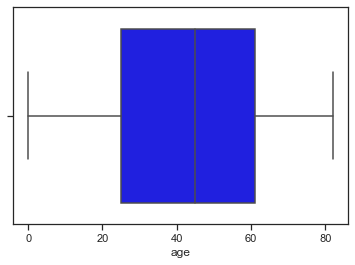

In [96]:
sns.boxplot(x='age',data=df , color = 'Blue')


# Pairplot

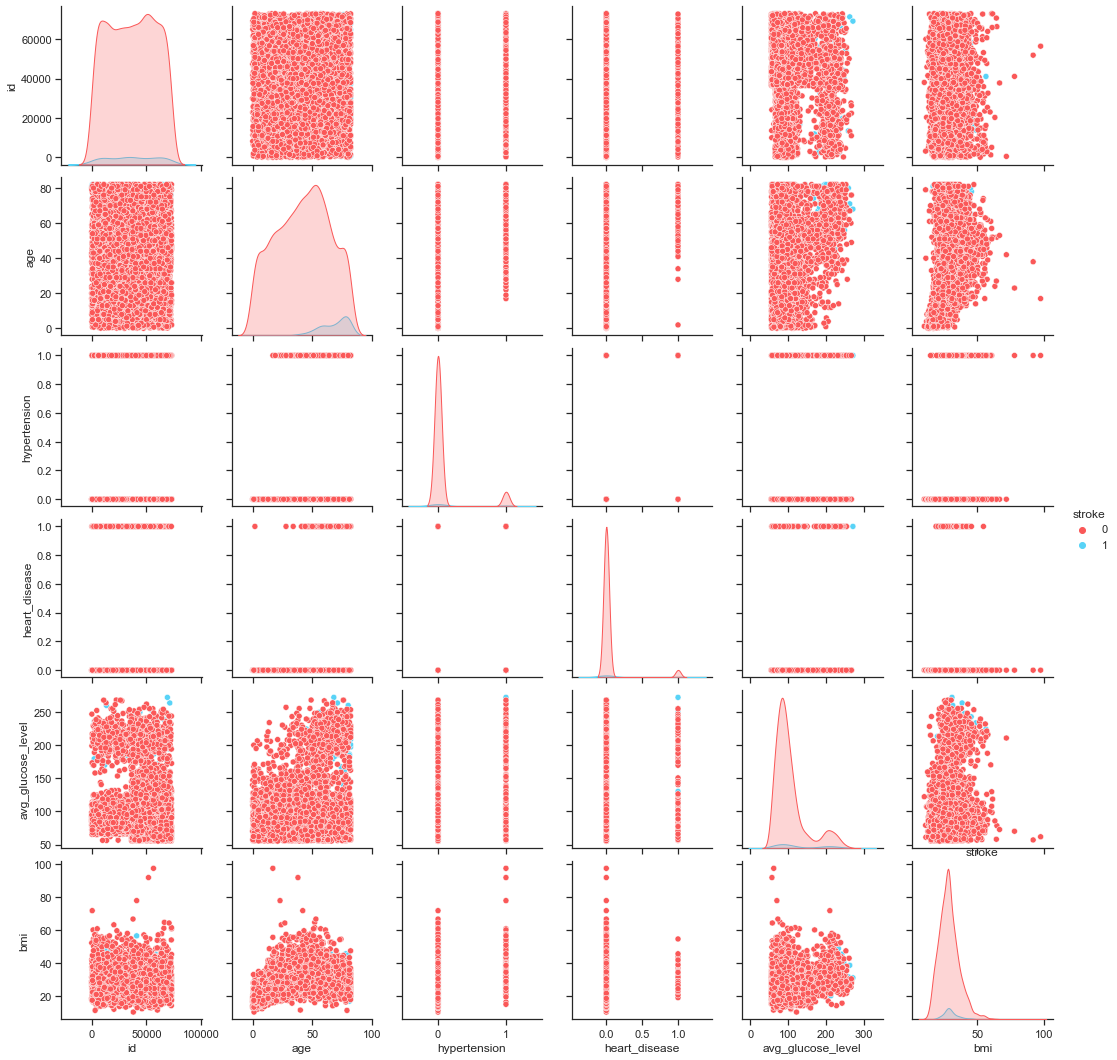

In [97]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");
